#### This notebook was created to follow [Ashwini Swain's notebook](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic) for learning purposes.

### Part1 : Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# checking for total null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

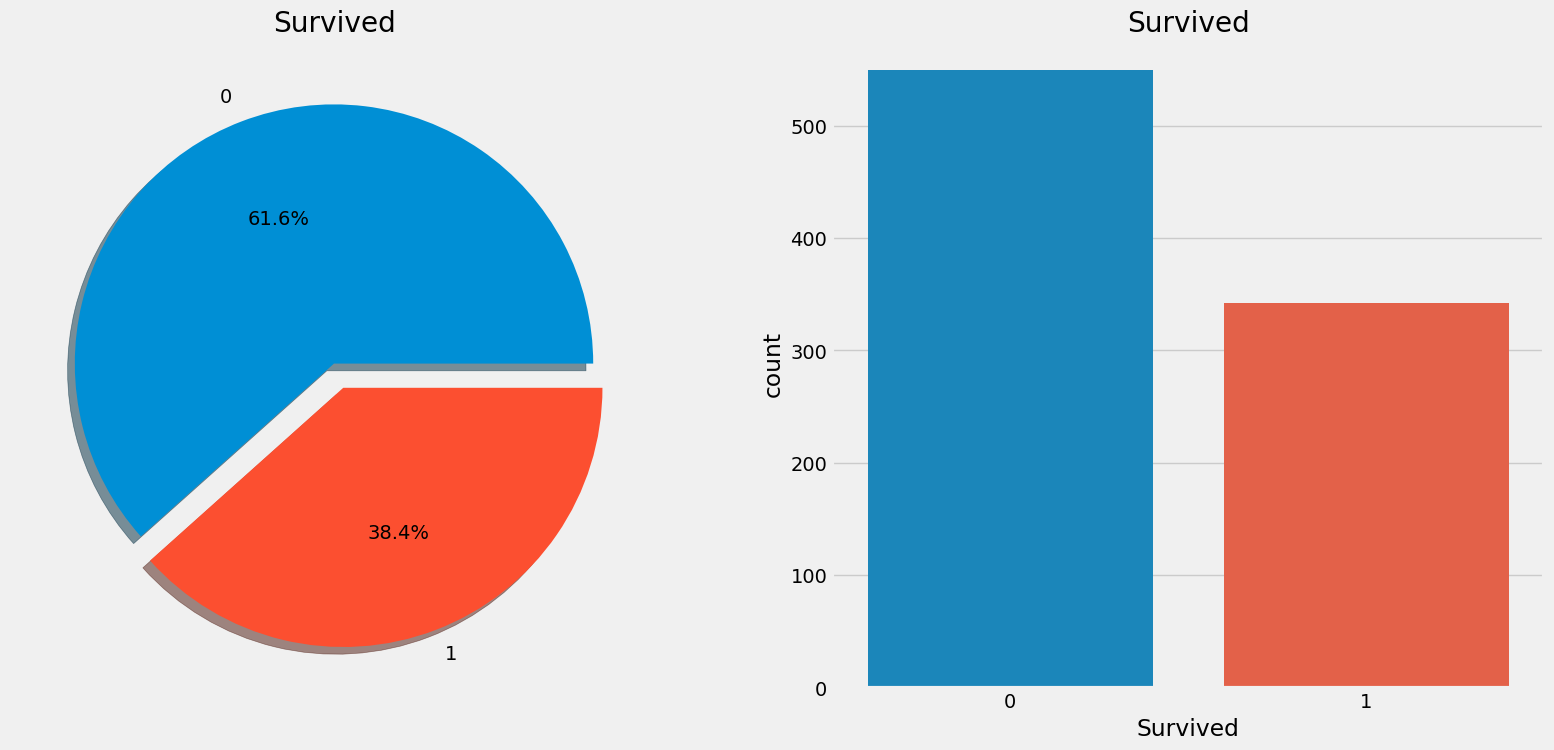

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### Types of Features

* Categorical Features : Sex, Embarked
* Ordinal Features : PClass
* Continous Features : Age

### Analysing The Features
#### Sex -> Categorical Feature

In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

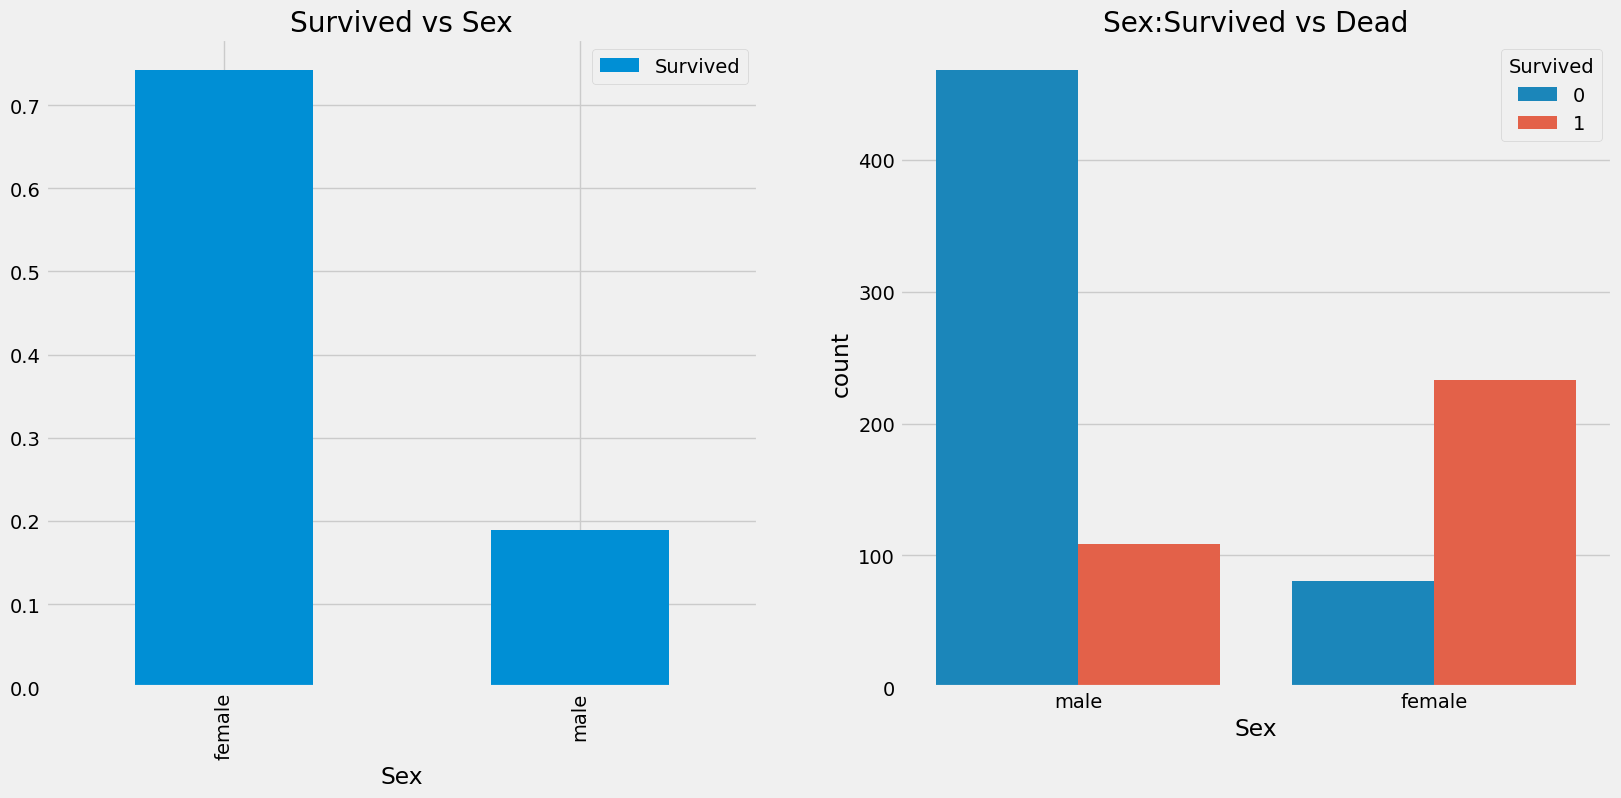

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### Pclass -> Ordinal Feature

In [7]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


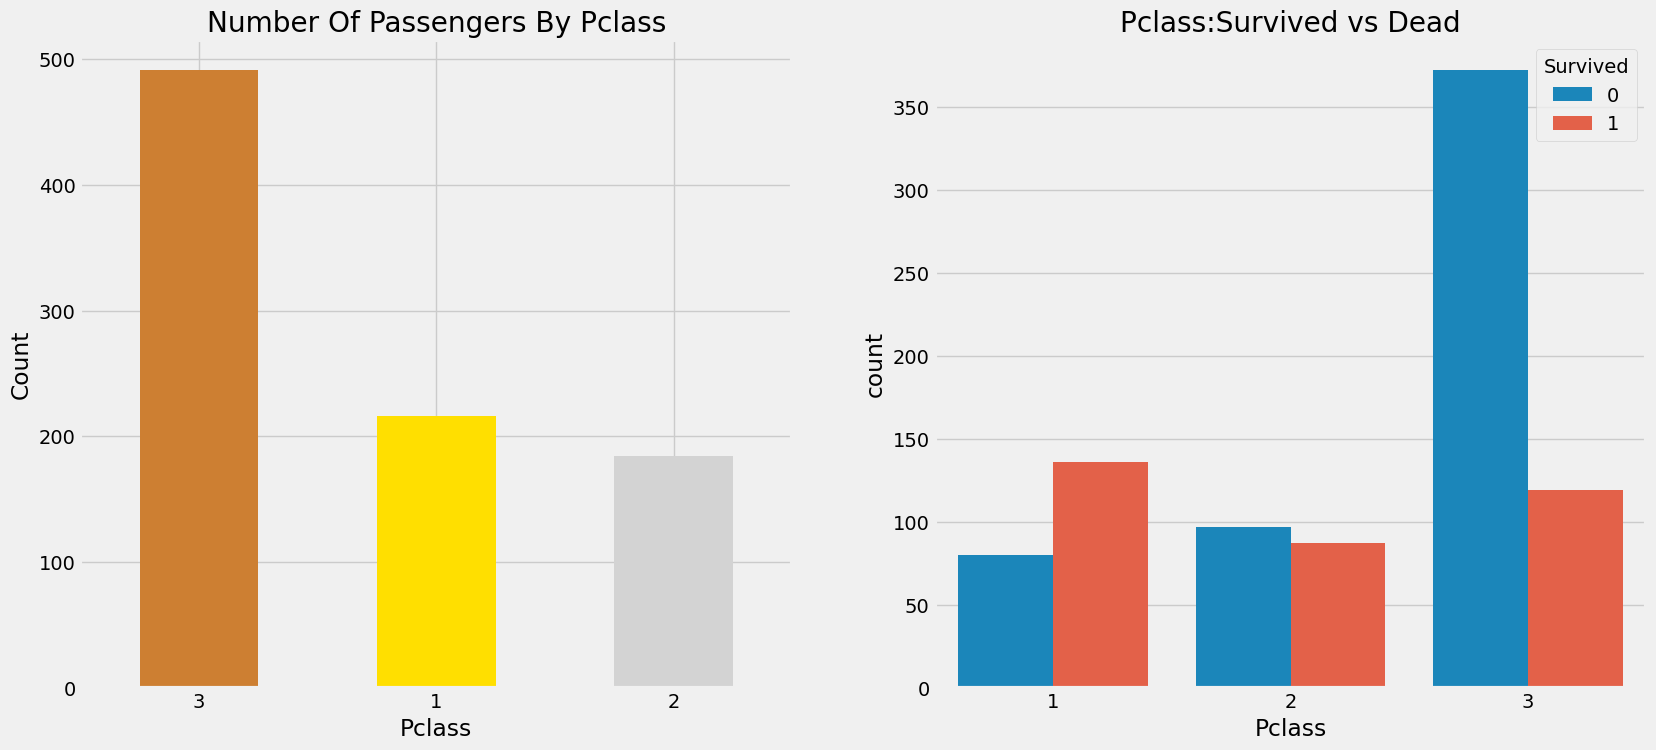

In [8]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=0)
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [9]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

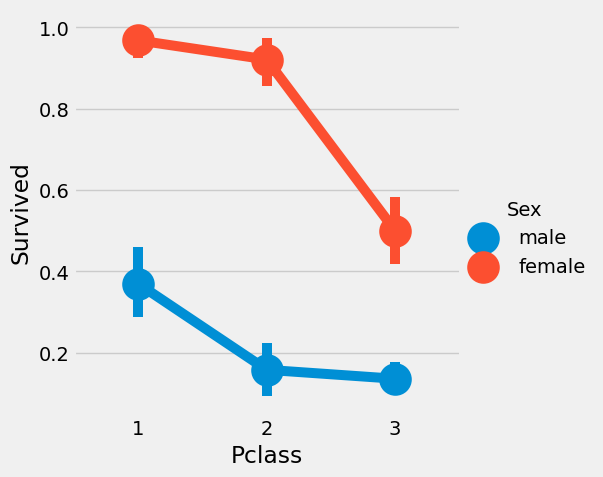

In [10]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

### Age -> Continous Feature

In [11]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passanger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passanger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


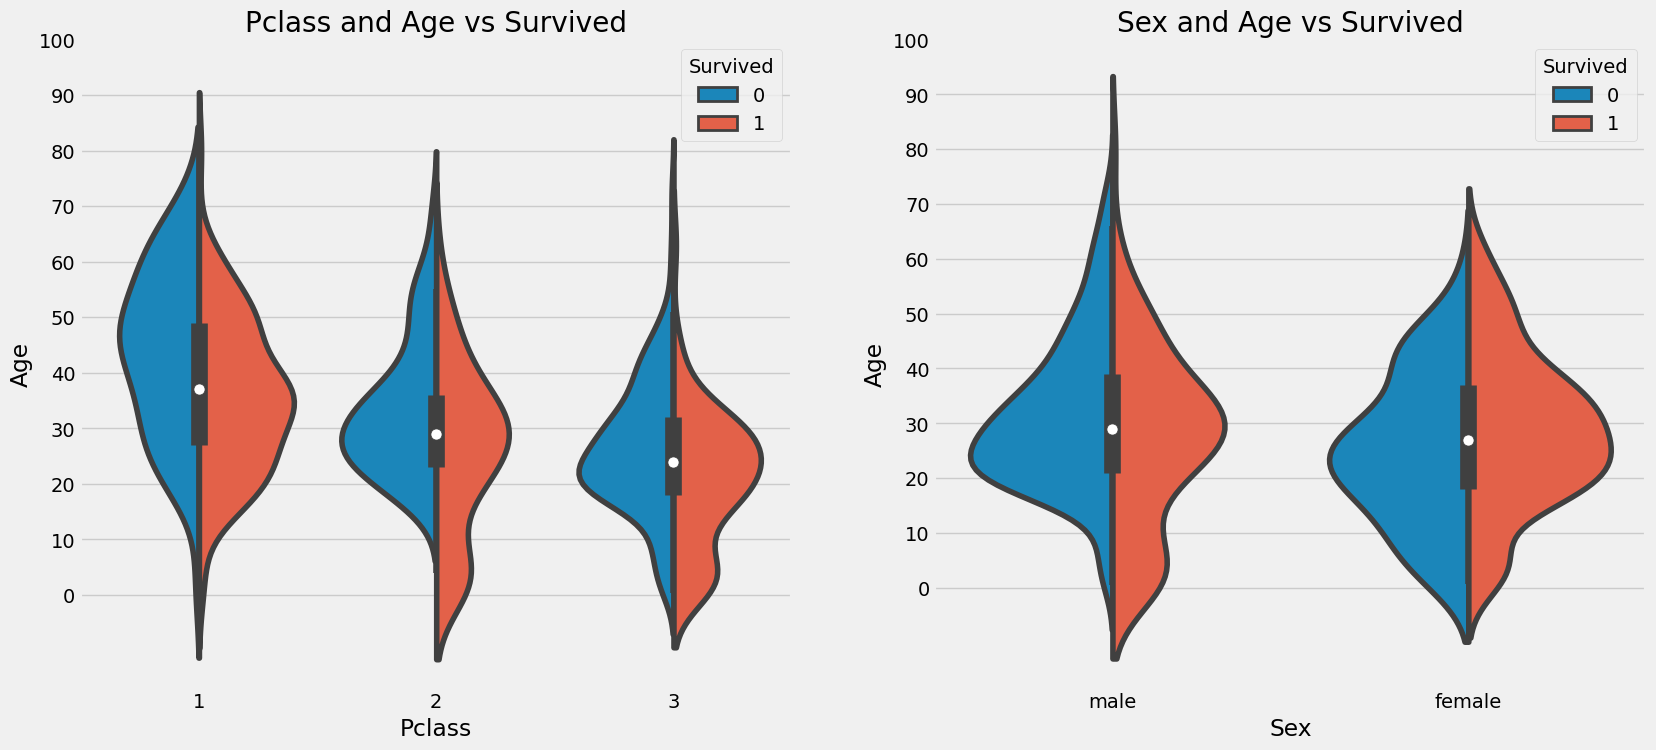

In [12]:
fig, ax = plt.subplots(1, 2, figsize=[18, 8])
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### "What's In A Name??" -> Feature :p

In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [14]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [17]:
# Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Master'), 'Age'] = 5
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Miss'), 'Age'] = 22
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Other'), 'Age'] = 46

In [18]:
data['Age'].isnull().any()

False

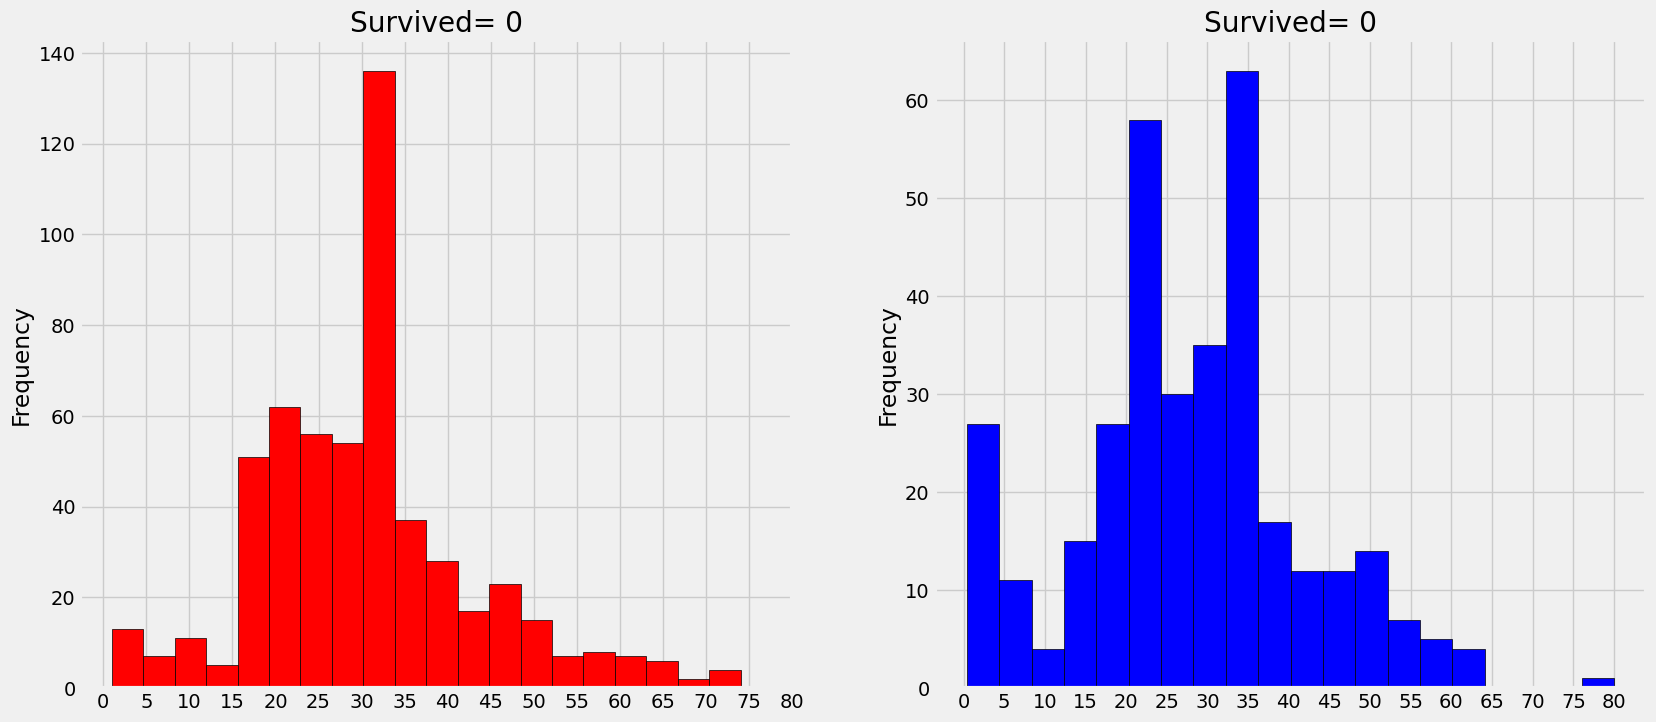

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
data[data['Survived'] == 0]['Age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1]['Age'].plot.hist(ax=ax[1], bins=20, edgecolor='black', color='blue')
ax[1].set_title('Survived= 0')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

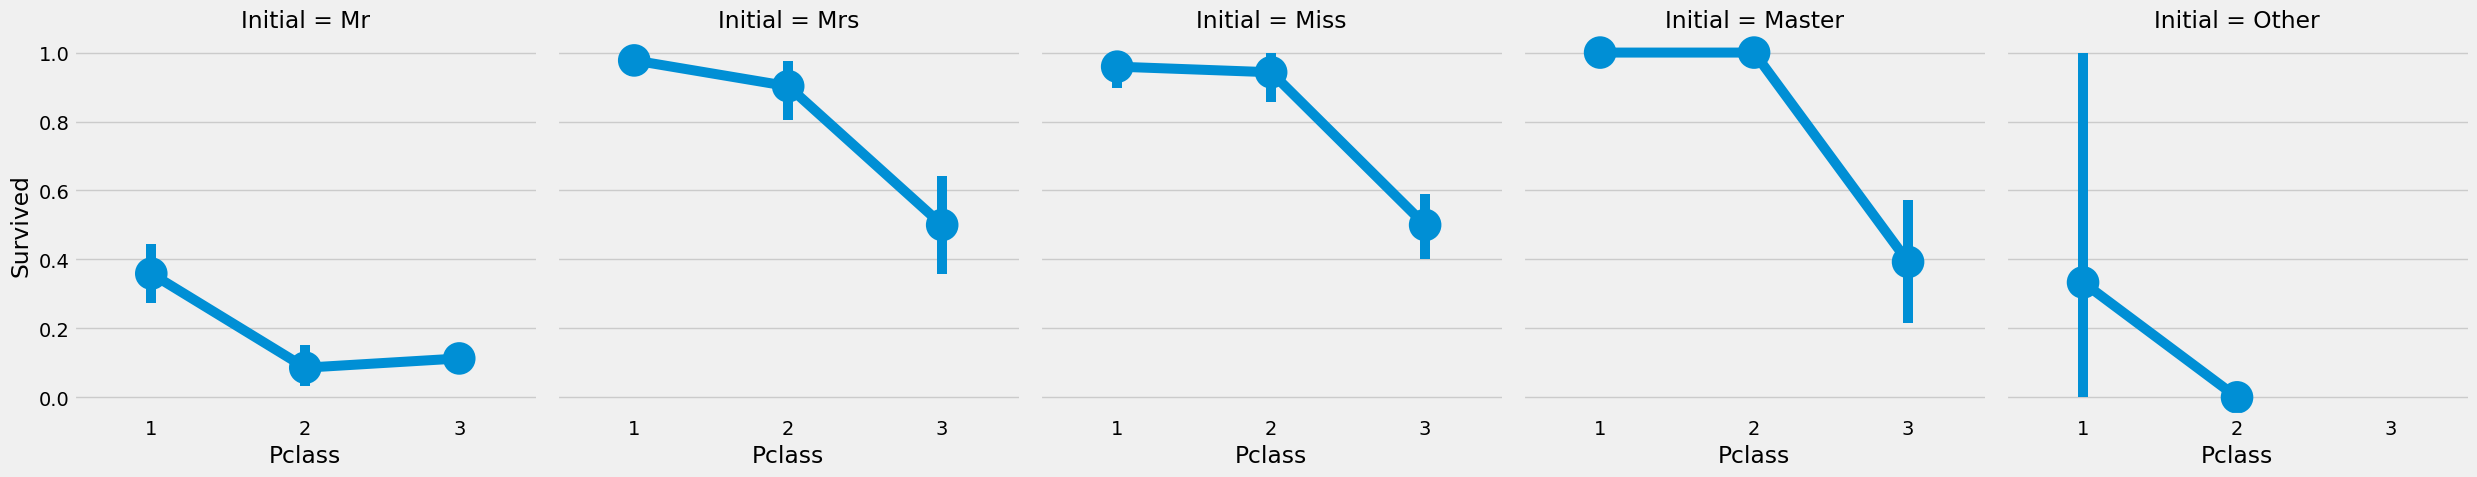

In [20]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

### Embarked -> Categorical Value

In [21]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Sex'], data['Survived']], margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port of Embarkation

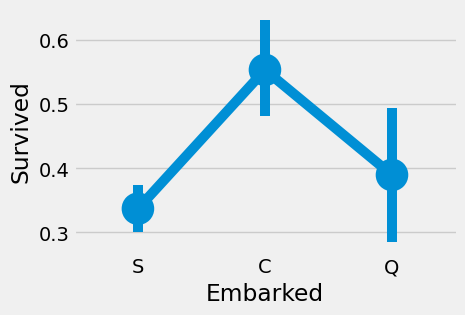

In [22]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()